In [2]:
import os
import sys
basepath = os.path.abspath(os.path.dirname(os.path.dirname('.')))
sys.path.append(basepath)
print(basepath)

from onsets_and_frames.dataset import SchubertWinterreiseDataset, Bach10Dataset
from onsets_and_frames import DEFAULT_SEQUENCE_LENGTH, SAMPLE_RATE, HOP_LENGTH

from torch.utils.data import DataLoader, ConcatDataset, Dataset


/media/mpk/external-nvme/onsets-and-frames-pytorch/jupyter_debugging


In [3]:
BATCH_SIZE = 1

In [4]:


dataset = Bach10Dataset(groups=['01', '02', '03', '04'])
loader = DataLoader(dataset, BATCH_SIZE, shuffle=True, drop_last=True)


Loading group 01: 100%|██████████| 1/1 [00:00<00:00, 597.91it/s]

Loading group 02: 100%|██████████| 1/1 [00:00<00:00, 421.33it/s]

Loading group 03: 100%|██████████| 1/1 [00:00<00:00, 623.04it/s]

Loading group 04: 100%|██████████| 1/1 [00:00<00:00, 364.47it/s]

Loading 4 groups of Bach10Dataset at data/Bach10


In [5]:
def plot_audio(audio_path):
    import matplotlib.pyplot as plt
    y, sr = librosa.load(audio_path, SAMPLE_RATE)

    plt.plot(y)
    plt.title('Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude)')



  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: __init__() got an unexpected keyword argument 'basey'

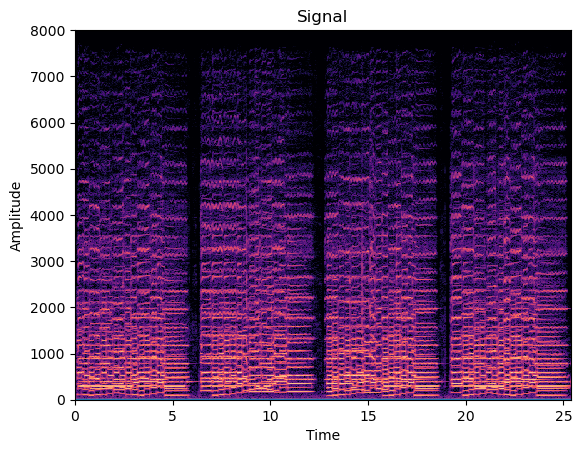

In [13]:
import numpy as np
import librosa
import librosa.display
from tqdm import tqdm
from onsets_and_frames import cycle, melspectrogram
from onsets_and_frames.constants import SAMPLE_RATE, HOP_LENGTH

def plot_audio(audio_path):
    """
    see tutorial:
    https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
    Args:
        audio_path:

    Returns:

    """
    import matplotlib.pyplot as plt
    y, sr = librosa.load(audio_path, SAMPLE_RATE)

    plt.plot(y)
    plt.title('Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')

    librosa.display.waveplot(y, sr=sr)

    spec = np.abs(librosa.stft(y, hop_length=HOP_LENGTH))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')


    mel_spect = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=HOP_LENGTH)
    mel_spect = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')


loop = tqdm(range(1, 2))
for i, batch in zip(loop, cycle(loader)):

    plot_audio(batch['path'][0])

    # audio_label = batch['audio']
    # onset_label = batch['onset']
    # offset_label = batch['offset']
    # frame_label = batch['frame']
    # velocity_label = batch['velocity']
    #
    # mel = melspectrogram(audio_label.reshape(-1, audio_label.shape[-1])[:, :-1]).transpose(-1, -2)
    #
    # librosa.display.specshow(mel, sr=SAMPLE_RATE, x_axis='time', y_axis='mel_log')

    print('asdf')